$$ y=-cos(\pi x) + sin(\pi x) + \epsilon, \quad \epsilon \in N(0,0.2) $$

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Data Generation
# np.random.seed(1234)
n = 30
num_rep = 10
X = np.linspace(0,10,n)
X = np.reshape(X.repeat(num_rep), (-1,1))
sigma = 0.2

f_true = lambda x: -np.cos(np.pi * x) + np.sin(4. * np.pi * x)
Y = f_true(X) + sigma * np.reshape(np.random.normal(loc=0, scale=sigma, size=n*num_rep), (-1,1))  # Training outputs

# ======== everything above is in a black-box, we only know X, Y ========

In [26]:
import GPy

# Define the kernel
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)

# Create the GP model
gp_model = GPy.models.GPRegression(X, Y, kernel)

# Optimize the model (find the best hyperparameters)
gp_model.optimize(messages=True)

# Print the optimized model's parameter values
print(gp_model)



Name : GP regression
Objective : -408.9620901379641
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |  priors
  rbf.variance             |     0.9976145277307645  |      +ve      |        
  rbf.lengthscale          |   7.78811744787819e-06  |      +ve      |        
  Gaussian_noise.variance  |  0.0015993672827872415  |      +ve      |        


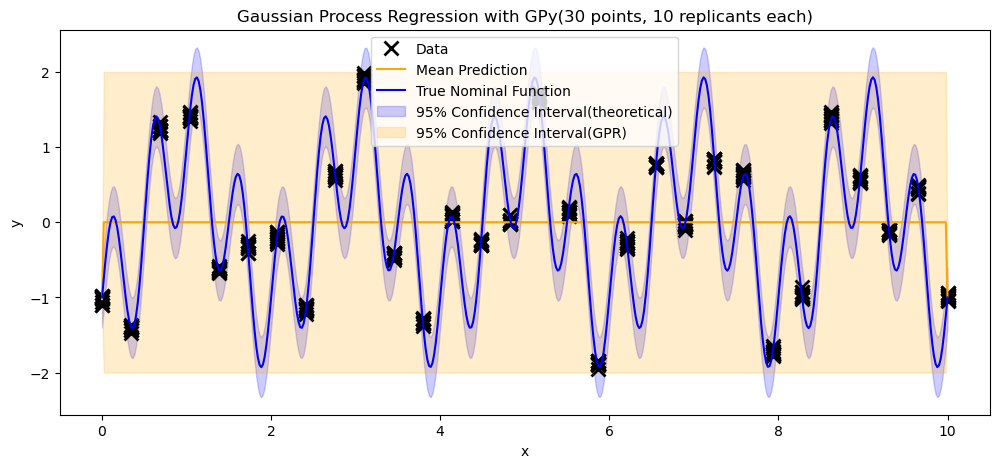

In [27]:
# Predict at new data points
X_new = np.linspace(0, 10, 500).reshape(-1, 1)  # Test inputs
Y_pred, Y_var = gp_model.predict(X_new)  # Predictive mean and variance
Y_true = np.array([f_true(xn) for xn in X_new])

# Plotting
plt.figure(figsize=(12, 5))
plt.plot(X, Y, 'kx', markersize=10, markeredgewidth=2, label="Data")

plt.plot(X_new, Y_pred, label='Mean Prediction', color='orange')
plt.plot(X_new, Y_true, label="True Nominal Function", color="blue")
plt.fill_between(X_new.flatten(), (Y_true - 2*sigma).flatten(), (Y_true + 2*sigma).flatten(), color='blue',
                 alpha=0.2, label='95% Confidence Interval(theoretical)')

plt.fill_between(X_new.flatten(), (Y_pred - 2*np.sqrt(Y_var)).flatten(), (Y_pred + 2*np.sqrt(Y_var)).flatten(), color='orange',
                 alpha=0.2, label='95% Confidence Interval(GPR)')
plt.title(f"Gaussian Process Regression with GPy({n} points, {num_rep} replicants each)")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
